In [9]:

def read_grid_from_file(file_path):
    grid = []
    starts_goals=[]
    lineNumber =0
    with open(file_path, 'r') as file:
        for line in file:
            lineNumber+=1
            if 2<lineNumber<6:
                line_split = line.strip().split()
                start = line_split[3]
                start = ( int(start[1:-1].split(",")[1]), int(start[1:-1].split(",")[0]))
                goal = line_split[6]
                goal = ( int(goal[1:-1].split(",")[1]), int(goal[1:-1].split(",")[0]))
                starts_goals.append([start,goal])
            if lineNumber>5:
                line_split = list(line.strip())
                if len(line_split)==0:
                    continue
                # Strip the newline character and split by spaces
                grid.append(line_split)
    return grid,starts_goals

In [10]:

import matplotlib.pyplot as plt
import numpy as np


def plot_grid(grid, path=None, start=None, goal=None):

    
    # Create a color map for the grid
    cmap = plt.cm.get_cmap('Greys')
    cmap.set_under(color='white') # Free space color
    cmap.set_over(color='black') # Obstacle color
    grid_array = np.asarray(grid)
    fig, ax = plt.subplots()
    # Plot the grid with respect to the upper left-hand corner
    ax.matshow(grid_array, cmap=cmap, vmin=0.1, vmax=1.0, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(np.arange(-0.5, len(grid[0]), 1))
    ax.set_yticks(np.arange(-0.5, len(grid), 1))
    ax.set_xticklabels(range(0, len(grid[0])+1))
    ax.set_yticklabels(range(0, len(grid)+1))
    # Plot the path with direction arrows
    if path:
        for i in range(len(path) - 1):
            start_y,start_x = path[i]
            end_y, end_x  = path[i + 1]
            ax.arrow(start_x, start_y, end_x - start_x, end_y - start_y,
                head_width=0.3, head_length=0.3, fc='blue', ec='blue')
        # Plot the last point in the path
        ax.plot(path[-1][0], path[-1][1], 'b.')
        # Plot the start and goal points
        if start:
            ax.plot(start[1], start[0], 'go') # Start point in green
        if goal:
            ax.plot(goal[1], goal[0], 'ro') # Goal point in red
    return fig

In [11]:

def breath_first_search(start, goal, grid_numerical):
    visited = set()
    queue_to_visit = [start]
    pathway={}
    path = []
    curr = None
    #prev_node = None
    while queue_to_visit:
        #prev_node = curr
        curr = queue_to_visit.pop(0)
        
        if curr == goal:
            while True:
                path.append(curr)
                if curr == start:
                    path = path[::-1]
                    return path
                curr = pathway[curr]
                
        if curr not in visited:
            visited.add(curr)
            neighbors = get_neighbors(curr, grid_numerical)
            for n in neighbors:
                if n not in visited:
                    queue_to_visit.append(n)
                    pathway[n]=curr
    return None

In [12]:

def neighbors_four():
    return [[-1,0], #up
            [0,1], #right
            [1,0], #down
            [0,-1] #left
            ]

def get_neighbors(curr, grid):
    possible_neighbors = neighbors_four()
    possible_neighbors.reverse()
    neighbors = []
    for pn in possible_neighbors:
        row = curr[0] + pn[0]
        col = curr[1] + pn[1]
        if 0 <= row < len(grid) and 0 <= col < len(grid[0]) and grid[row][col] == 0:
            neighbors.append((row, col))
    return neighbors

In [13]:

def bfs_run(mapFile):
    
    #file_path = './maps/map1.txt'
    grid, start_goals = read_grid_from_file(mapFile)
    grid_numerical = [[1 if cell == 'X' else 0 for cell in row] for row in grid]
    grid_numerical = np.flipud(grid_numerical)
    for start,goal in start_goals:
        
        #start_flip = (len(grid_numerical)-1-start[0],start[1])
        #goal_flip = (len(grid_numerical)-1-goal[0],goal[1])
        start_flip = start
        goal_flip = goal
        path = breath_first_search(start_flip,goal_flip,grid_numerical)
        plot_grid(grid_numerical,path,start_flip,goal_flip)
  

In [14]:
        
def pathPlanningAnalysis():
    file_path = './maps/map1.txt'
    bfs_run(file_path)
    
    file_path = './maps/map2.txt'
    bfs_run(file_path)

    file_path = './maps/map3.txt'
    bfs_run(file_path)


/tmp/ipykernel_197418/279841247.py:10: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()
  cmap.set_under(color='white') # Free space color
/tmp/ipykernel_197418/279841247.py:11: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greys").copy()
  cmap.set_over(color='black') # Obstacle color


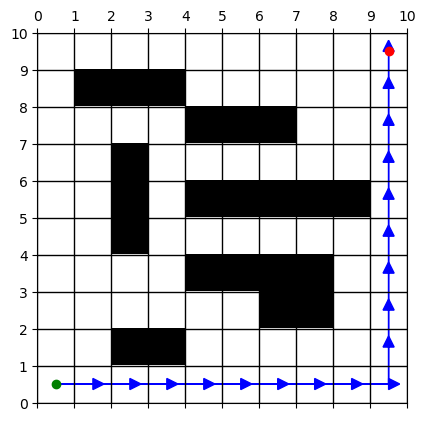

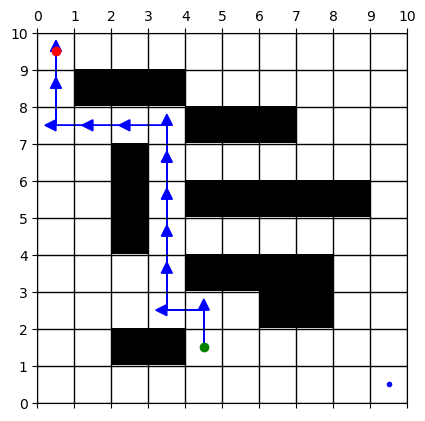

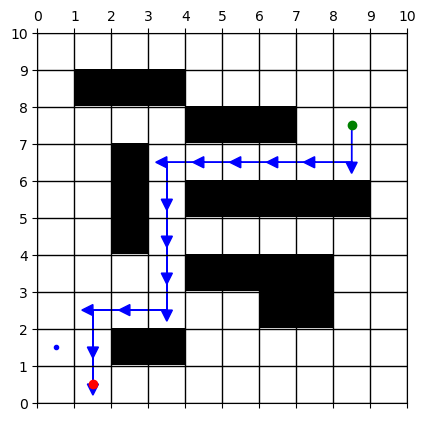

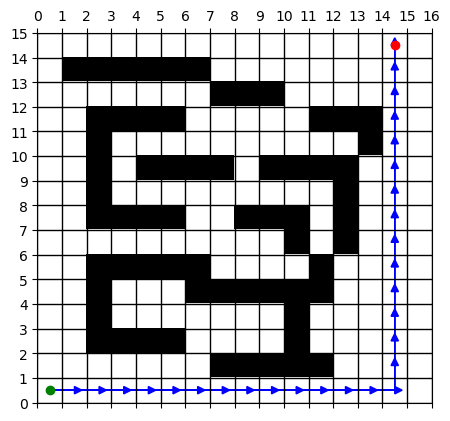

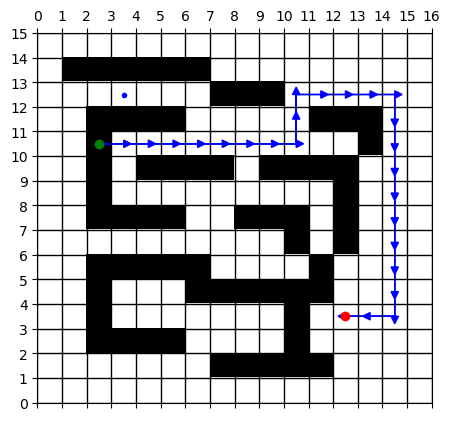

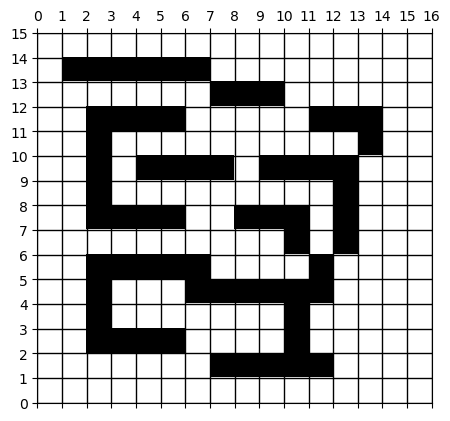

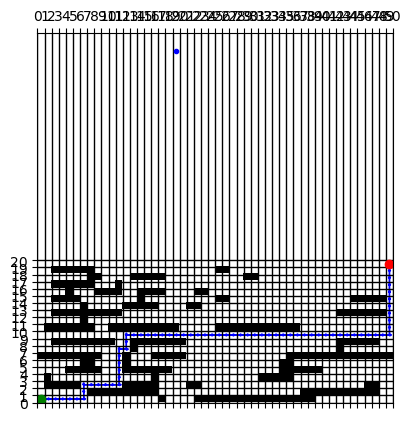

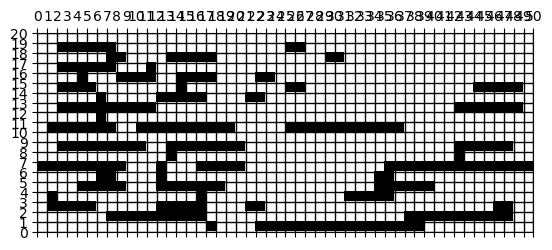

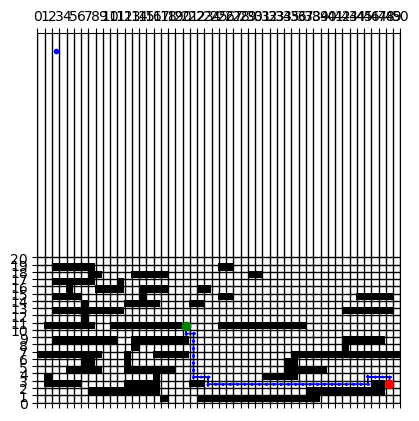

In [15]:
pathPlanningAnalysis()